In [5]:
# https://medium.com/@betulmesci/dimensionality-reduction-with-principal-component-analysis-and-linear-discriminant-analysis-on-iris-dc1731c07fad

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#Features
X = data.iloc[:,0:4]

#Target
target = data.iloc[:,4]
#Combine features and target in a dataframe:
df = pd.concat([X, target], axis=1)

Text(0.5, 1.0, 'Clustering on basis of sepal component')

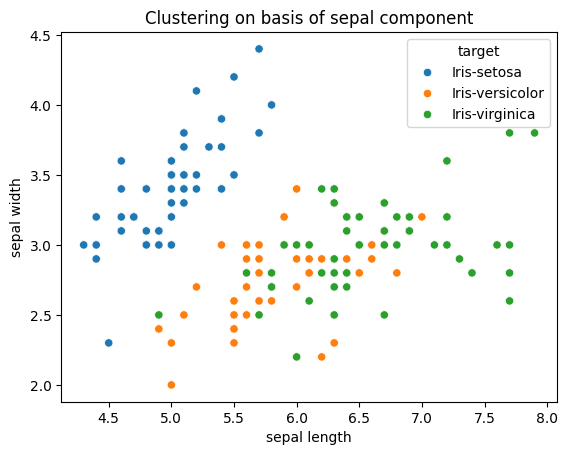

In [21]:
sns.scatterplot(x='sepal length', y='sepal width', data=df, hue='target')
plt.title('Clustering on basis of sepal component')

Text(0.5, 1.0, 'Clustering on basis of petal component')

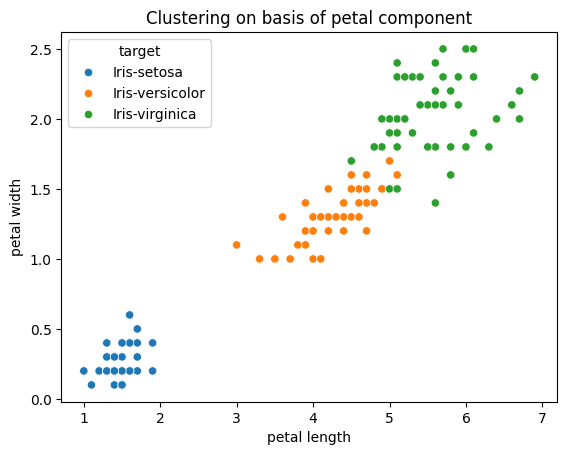

In [22]:
sns.scatterplot(x='petal length', y='petal width', data=df, hue='target')
plt.title('Clustering on basis of petal component')

In [10]:
X.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
Z = (X - X.mean())
Z.head(5)

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [13]:
Z_cov = Z.cov()
Z_cov

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [14]:
eigenvalues, eigenvectors = np.linalg.eig(Z_cov)

print('Eigen values:\n', eigenvalues)
print('\nEigen vectors:\n', eigenvectors)

Eigen values:
 [4.22484077 0.24224357 0.07852391 0.02368303]

Eigen vectors:
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [15]:
sort_index = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[sort_index]
sorted_eigenvectors = eigenvectors[:, sort_index]

print('Eigen values:\n', sorted_eigenvalues)
print('\nEigen vectors:\n', sorted_eigenvectors)

Eigen values:
 [4.22484077 0.24224357 0.07852391 0.02368303]

Eigen vectors:
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [16]:
eigenvector_n_comp = sorted_eigenvectors[:, 0:1]

#Calculate new features:
new_features = np.dot(eigenvector_n_comp.transpose() , Z.transpose()).transpose()
# new_features

In [17]:
one_comp_feat = pd.DataFrame(new_features , columns = ['PC1'])
one_comp_feat.head()

,PC1
0,-2.684207
1,-2.715391
2,-2.889820
3,-2.746437
4,-2.728593


In [18]:
one_comp_df = pd.concat([one_comp_feat, pd.DataFrame(target)], axis = 1)
one_comp_df['y-axis']=0
one_comp_df.head()

,PC1,target,y-axis
0,-2.684207,Iris-setosa,0
1,-2.715391,Iris-setosa,0
2,-2.889820,Iris-setosa,0
3,-2.746437,Iris-setosa,0
4,-2.728593,Iris-setosa,0


Text(0.5, 1.0, 'Features transformed to 1D by PCA')

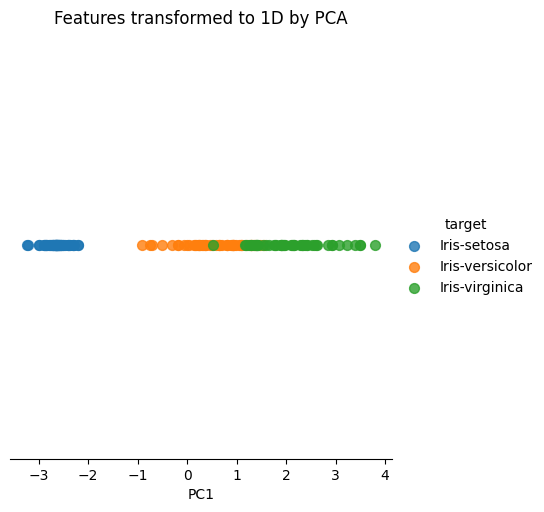

In [19]:
#Plot the projected data points o a number line
ax=sns.lmplot(data=one_comp_df, x='PC1', y = 'y-axis', hue='target', scatter_kws={'s':50  }, fit_reg=False)
ax = plt.gca()
#hide y-axis
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(-0.05, 0.05)
plt.title("Features transformed to 1D by PCA")